In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd .read_csv('emotion_sentimen_dataset.csv', encoding='utf-8')

In [5]:
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [6]:
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
    "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',
    'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who',
    'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
    'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while'
])

In [ ]:
df.shape

(168083, 3)

In [7]:
import re
import string
def lemmatize_word(word):
    lem_dict = {'running': 'run', 'flies': 'fly', 'dying': 'die', 'went': 'go', 'better': 'good'}
    return lem_dict.get(word, word)

# Function to expand contractions
def expand_contractions(text):
    contractions_dict = {
        "can't": "cannot", "won't": "will not", "n't": " not",
        "'re": " are", "'s": " is", "'d": " would", "'ll": " will",
        "'t": " not", "'ve": " have", "'m": " am"
    }
    for key, value in contractions_dict.items():
        text = re.sub(r"\b" + re.escape(key) + r"\b", value, text)
    return text

def clean_text(text):
    text = expand_contractions(text)  # Expand contractions
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'@\w+', '', text)  # Remove @usernames
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = text.encode('ascii', 'ignore').decode('ascii')  # Remove emojis
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([lemmatize_word(word) for word in text.split() if word not in stop_words])  # Lemmatization & Stopword removal
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text


# Example usage
sample_text = "I'm happy! Can't wait to see you."
print(clean_text(sample_text))

happy can not wait to see


In [8]:
# Apply preprocessing
df['Clean_Text'] = df['text'].astype(str).apply(clean_text)

In [9]:
x = df['Clean_Text']
y = df['Emotion']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state = 42)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [13]:
# Build Logistic Regression Model with TfidfVectorizer
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), max_features=500)),
    ('lr', LogisticRegression(max_iter=500, solver='liblinear'))
])

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Ensure x_train is a Series containing text
x_train = x_train.squeeze()  # Convert DataFrame to Series if x_train has a single column

# Create the pipeline
pipe_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('vectorizer', TfidfVectorizer()),                      # Convert text to numeric features
    ('logreg', LogisticRegression())                        # Train logistic regression model
])

In [19]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Ensure x_train is a 1D array or pandas Series containing text data
print(f"Type of x_train: {type(x_train)}")
print(f"Shape of x_train: {x_train.shape}")
print("First few entries in x_train:")
print(x_train[:5])  # or use x_train.head() if it's a pandas Series

# If x_train is a pandas Series, convert to numpy array of strings
if isinstance(x_train, pd.Series):
    x_train = x_train.astype(str).values  # Convert to numpy array of strings

# If x_train is a numpy ndarray, ensure it's a 1D array
if isinstance(x_train, np.ndarray) and len(x_train.shape) > 1:
    x_train = x_train.flatten()  # Flatten 2D array to 1D

# Check again the shape and first few values
print(f"Shape of x_train after preprocessing: {x_train.shape}")
print("First few entries in x_train after preprocessing:")
print(x_train[:5])

# Create the pipeline with TfidfVectorizer for text data
pipe_lr = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Vectorize the text data
    ('imputer', SimpleImputer(strategy='mean')),  # Handle any missing values
    ('logreg', LogisticRegression())  # Train a Logistic Regression model
])

# Fit the entire pipeline
pipe_lr.fit(x_train, y_train)  # Fit the pipeline on training data

# Generate predictions for train and test sets
y_train_pred = pipe_lr.predict(x_train)
y_test_pred = pipe_lr.predict(x_test)

# Ensure consistent label types (convert to string)
y_train = y_train.astype(str)
y_test = y_test.astype(str)
y_train_pred = y_train_pred.astype(str)
y_test_pred = y_test_pred.astype(str)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output results
print(f"🔹 Logistic Regression Train Accuracy: {train_accuracy:.4f}")
print(f"🔹 Logistic Regression Test Accuracy:  {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:
    print("Potential Overfitting Detected: Significant gap between train and test accuracy.")
else:
    print("No significant overfitting detected.")

Type of x_train: <class 'numpy.ndarray'>
Shape of x_train: (11236, 1)
First few entries in x_train:
[['feel terrified even time to write out how feel about mr']
 ['just some ombr highlights at bottom for very sun kissed natural feel by jos at neville s on pont street s very talented']
 ['combine flat tire head wound headless bird im feeling little paranoid']
 ['feel like would distracted not done enough school work where today']
 ['feel like obnoxious by posting every three seconds']]
Shape of x_train after preprocessing: (11236,)
First few entries in x_train after preprocessing:
['feel terrified even time to write out how feel about mr'
 'just some ombr highlights at bottom for very sun kissed natural feel by jos at neville s on pont street s very talented'
 'combine flat tire head wound headless bird im feeling little paranoid'
 'feel like would distracted not done enough school work where today'
 'feel like obnoxious by posting every three seconds']
🔹 Logistic Regression Train Accur

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


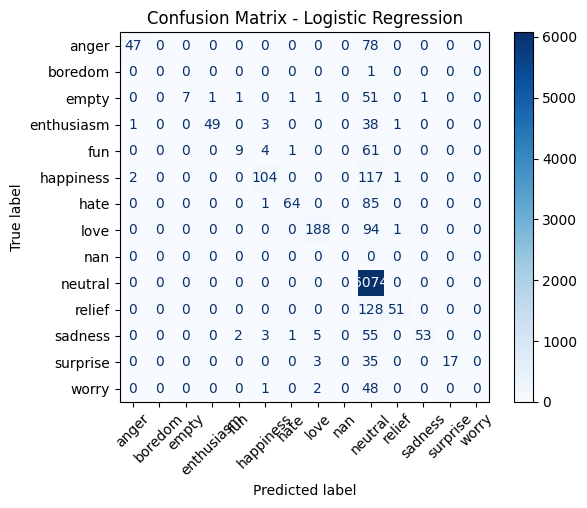

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure consistent label order and type
labels = sorted(df['Emotion'].astype(str).unique())

# Convert y_test and y_test_pred to string for consistency
y_test = y_test.astype(str)
y_test_pred = y_test_pred.astype(str)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


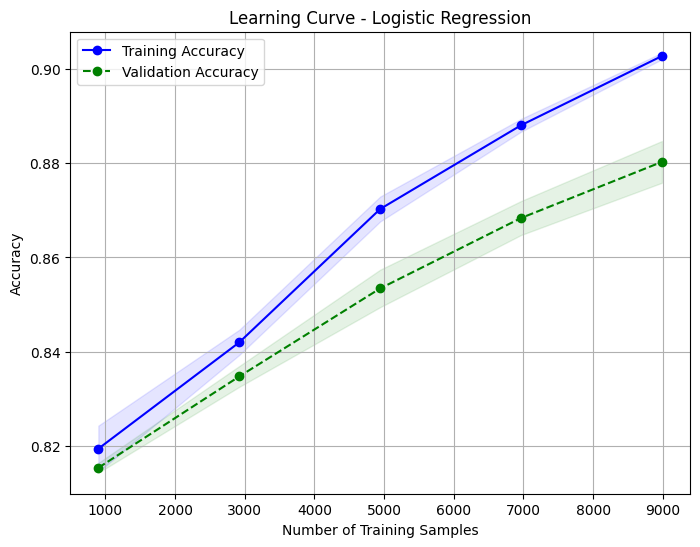

In [52]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipe_lr,      # Your trained pipeline
    X=x_train,              # Training features
    y=y_train,              # Training labels
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # Use accuracy metric
    train_sizes=np.linspace(0.1, 1.0, 5),  # 5 points from 10% to 100% of training data
    n_jobs=-1               # Use all CPU cores
)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o--', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Learning Curve - Logistic Regression')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



([<matplotlib.patches.Wedge at 0x7e4f8f9be050>,
 [Text(-0.9152441276088861, 0.6101870097580326, 'neutral'),
  Text(0.545038463587048, -0.9554753127164879, 'love'),
  Text(0.7392744808621128, -0.814538668171164, 'happiness'),
  Text(0.8622784845440636, -0.6829903477300343, 'relief'),
  Text(0.9437416926748549, -0.565112039782555, 'hate'),
  Text(1.00208830787823, -0.4536728151583981, 'sadness'),
  Text(1.0440670209885683, -0.3463005279869736, 'anger'),
  Text(1.0703541714686458, -0.25365714580841053, 'enthusiasm'),
  Text(1.0857051736712136, -0.1767605042523924, 'fun'),
  Text(1.0940931591862222, -0.11384269419647364, 'surprise'),
  Text(1.0979720677406313, -0.06676330175600059, 'empty'),
  Text(1.099761992518457, -0.022881429409762444, 'worry'),
  Text(1.099999613229411, -0.0009224397791783012, 'boredom')])

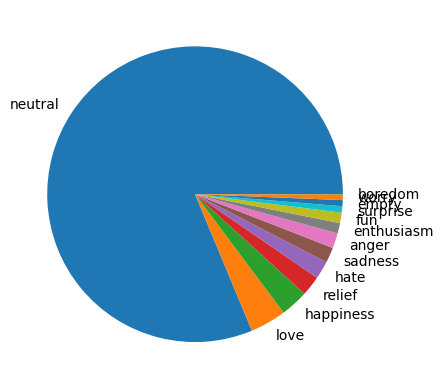

In [53]:
plt.pie(df.Emotion.value_counts(), labels = df.Emotion.value_counts().index)

In [54]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=867abb27d12dde912f9f75dba8062d92b05406843d180c723b1f96007a054a5d
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [55]:
profile = ProfileReport(df, title="Emotion Recognition")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
from sklearn.svm import SVC

# Define SVM model
svm = SVC(kernel='linear', probability=True)

# Define TF-IDF + SVM pipeline
pipe_svm = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_features=500)),
    ('svm', svm)
])

In [39]:
# Train and evaluate SVM
pipe_svm.fit(x_train, y_train)
y_pred_svm = pipe_svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("\n=== SVM Results ===")
print(f"Accuracy: {acc_svm:.4f}")
print(classification_report(y_test, y_pred_svm))


=== SVM Results ===
Accuracy: 0.9203
              precision    recall  f1-score   support

       anger       0.91      0.58      0.71       125
     boredom       0.00      0.00      0.00         1
       empty       0.00      0.00      0.00        63
  enthusiasm       0.98      0.70      0.82        92
         fun       0.87      0.81      0.84        75
   happiness       0.92      0.60      0.73       224
        hate       0.97      0.67      0.79       150
        love       0.96      0.81      0.88       283
     neutral       0.92      1.00      0.96      6074
      relief       0.94      0.41      0.57       179
     sadness       0.98      0.71      0.83       119
    surprise       0.00      0.00      0.00        55
       worry       0.00      0.00      0.00        51

    accuracy                           0.92      7491
   macro avg       0.65      0.48      0.55      7491
weighted avg       0.90      0.92      0.90      7491



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


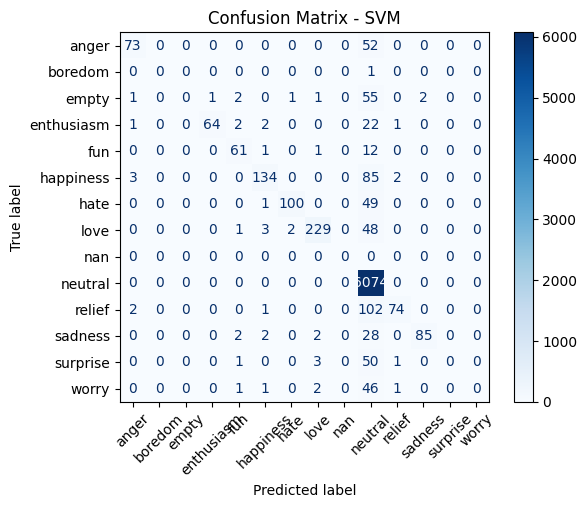

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure all labels are strings (if not already)
y_test = y_test.astype(str)
y_pred_svm = y_pred_svm.astype(str)

# Get all unique labels in sorted order for display
labels = sorted(df['Emotion'].astype(str).unique())

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svm, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - SVM")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


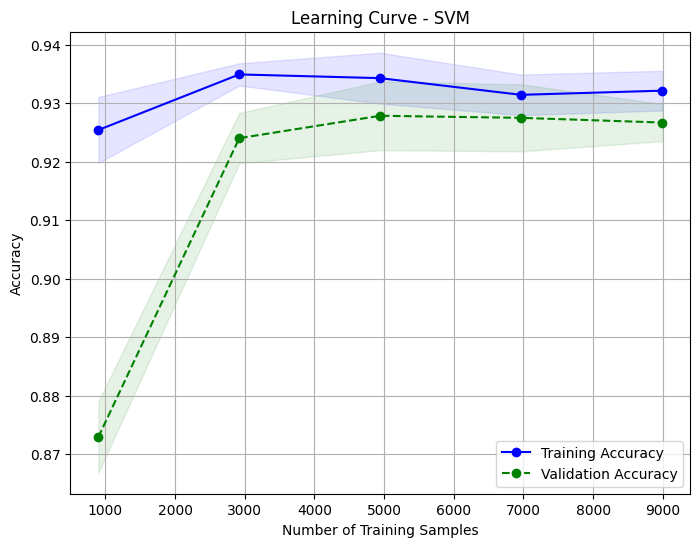

In [41]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipe_svm,
    X=x_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o--', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.title('Learning Curve - SVM')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [42]:

from xgboost import XGBClassifier

# Define XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define TF-IDF + XGBoost pipeline
pipe_xgb = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_features=500)),
    ('xgb', xgb)
])

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.4, random_state=42)

pipe_xgb.fit(x_train, y_train)
y_pred_xgb = pipe_xgb.predict(x_test)

# Evaluate
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("\n=== XGBoost Results ===")
print(f"Accuracy: {acc_xgb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:21:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost Results ===
Accuracy: 0.9211
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.59      0.72       125
           1       0.00      0.00      0.00         1
           2       0.50      0.02      0.03        63
           3       0.97      0.72      0.82        92
           4       0.85      0.81      0.83        75
           5       0.93      0.61      0.73       224
           6       0.97      0.66      0.79       150
           7       0.97      0.81      0.88       283
           8       0.92      1.00      0.96      6074
           9       0.94      0.42      0.58       179
          10       0.98      0.72      0.83       119
          11       0.00      0.00      0.00        55
          12       1.00      0.02      0.04        51

    accuracy                           0.92      7491
   macro avg       0.76      0.49      0.55      7491
weighted avg       0.91      0.92      0.91      7491



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== XGBoost Results ===
Accuracy: 0.9211
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.59      0.72       125
           1       0.00      0.00      0.00         1
           2       0.50      0.02      0.03        63
           3       0.97      0.72      0.82        92
           4       0.85      0.81      0.83        75
           5       0.93      0.61      0.73       224
           6       0.97      0.66      0.79       150
           7       0.97      0.81      0.88       283
           8       0.92      1.00      0.96      6074
           9       0.94      0.42      0.58       179
          10       0.98      0.72      0.83       119
          11       0.00      0.00      0.00        55
          12       1.00      0.02      0.04        51

    accuracy                           0.92      7491
   macro avg       0.76      0.49      0.55      7491
weighted avg       0.91      0.92      0.91      7491



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (14).

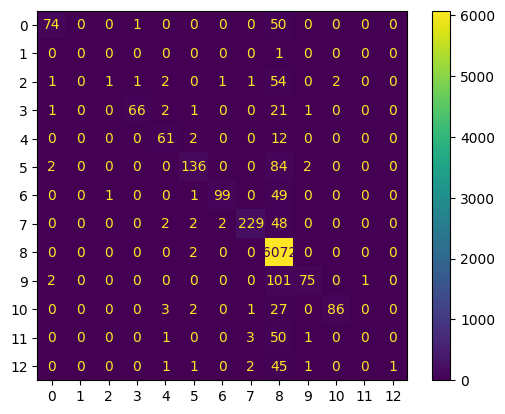

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Existing evaluation
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("\n=== XGBoost Results ===")
print(f"Accuracy: {acc_xgb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args,

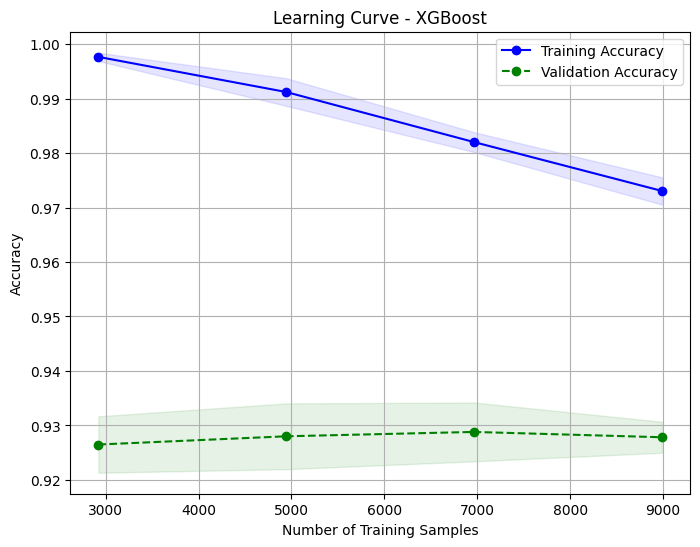

In [48]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curve data for the XGBoost pipeline
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipe_xgb,
    X=x_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

# Calculate mean and std for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o--', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.title('Learning Curve - XGBoost')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Define Naïve Bayes model
nb = MultinomialNB()

# Define TF-IDF + Naïve Bayes pipeline
pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_features=500)),
    ('nb', nb)
])

In [45]:
# Train and evaluate Naive Bayes

pipe_nb.fit(x_train, y_train)
y_pred_nb = pipe_nb.predict(x_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("\n=== Naive Bayes Results ===")
print(f"Accuracy: {acc_nb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))



=== Naive Bayes Results ===
Accuracy: 0.8358
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.10      0.19       125
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        63
           3       1.00      0.08      0.14        92
           4       0.75      0.04      0.08        75
           5       0.84      0.16      0.27       224
           6       1.00      0.14      0.25       150
           7       0.97      0.23      0.38       283
           8       0.83      1.00      0.91      6074
           9       0.95      0.11      0.19       179
          10       0.96      0.18      0.31       119
          11       0.00      0.00      0.00        55
          12       0.00      0.00      0.00        51

    accuracy                           0.84      7491
   macro avg       0.63      0.16      0.21      7491
weighted avg       0.83      0.84      0.78      7491



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


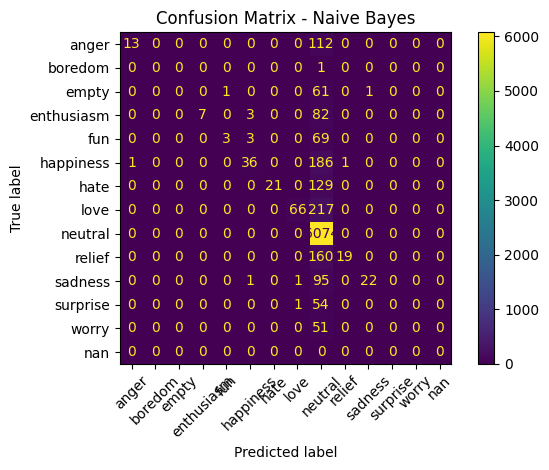

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# OPTIONAL: If you used LabelEncoder to encode the labels
# Make sure y_test and y_pred_nb are numpy arrays of encoded integers
# Decode them to original string labels
y_test_str = le.inverse_transform(y_test)
y_pred_nb_str = le.inverse_transform(y_pred_nb)

# Ensure all labels are consistent strings
labels = le.classes_.astype(str)

# Compute the confusion matrix
cm = confusion_matrix(y_test_str, y_pred_nb_str, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - Naive Bayes")
plt.grid(False)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


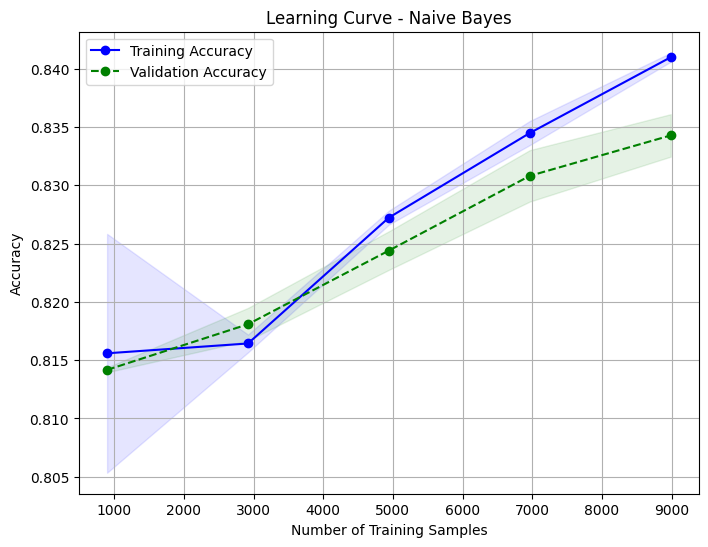

In [51]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipe_nb,
    X=x_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o--', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.title('Learning Curve - Naive Bayes')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()